### A notebook for data analysis of the sensitivity analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Specify the experiment wanted
value_to_vary_name = "preference-penalty-parking-outside-neighbourhood"
v = 0.4
replications = 6

# Read the pickle
series_df = pd.read_pickle(f'../results/sensitivity/sens_series_{value_to_vary_name}_{v}_{replications}r_df.pickle')
series_df.head()

,monthly-car-trips,monthly-shared-car-trips,monthly-public-transport-trips,monthly-bike-trips,count cars,shared-car-subscriptions,public-transport-subscriptions,mean-car-preference,monthly-car-trips,monthly-shared-car-trips,...,public-transport-subscriptions,mean-car-preference,monthly-car-trips,monthly-shared-car-trips,monthly-public-transport-trips,monthly-bike-trips,count cars,shared-car-subscriptions,public-transport-subscriptions,mean-car-preference
,0,0,0,0,0,0,0,0,1,1,...,4,4,5,5,5,5,5,5,5,5
0.0,0.0,0.0,0.0,0.0,1211.0,62.0,649.0,0.696224,0.0,0.0,...,632.0,0.701793,0.0,0.0,0.0,0.0,1252.0,57.0,614.0,0.702259
1.0,50998.0,1919.0,22063.0,10385.0,1201.0,83.0,633.0,0.694122,51508.0,1970.0,...,637.0,0.702931,52802.0,1924.0,20241.0,9837.0,1240.0,72.0,611.0,0.701902
2.0,50675.0,1826.0,22486.0,10256.0,1180.0,106.0,602.0,0.692774,50964.0,1912.0,...,626.0,0.703455,52406.0,1806.0,21022.0,9538.0,1209.0,103.0,590.0,0.70081
3.0,50551.0,1743.0,23199.0,10225.0,1164.0,109.0,627.0,0.692171,50407.0,1911.0,...,639.0,0.703789,51402.0,1828.0,22142.0,9497.0,1200.0,107.0,592.0,0.700789
4.0,49984.0,1825.0,23732.0,9911.0,1160.0,118.0,657.0,0.69169,50001.0,1900.0,...,639.0,0.703892,50888.0,1791.0,22496.0,9606.0,1183.0,114.0,609.0,0.700599


<AxesSubplot: >

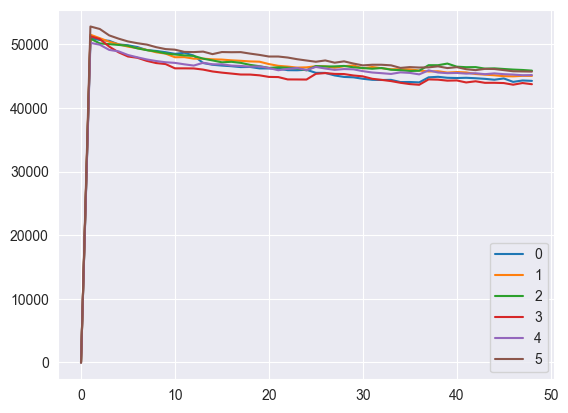

In [3]:
# Plot for one run all the variables
series_df["monthly-car-trips"].plot()

<AxesSubplot: >

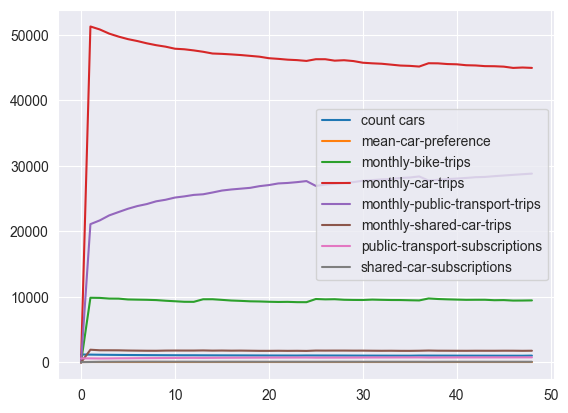

In [4]:
# Take the average of all the runs and plot those
series_df_agg = series_df.groupby(level=[0], axis="columns").mean()
series_df_agg.plot()

## Full sensitivity analysis

### Load data

In [5]:
sens_design = pd.read_excel("../sensitivity-analysis-design.xlsx")

In [6]:
reference = f'../results/sensitivity/sens_series_default_12r_df.pickle'

In [7]:
# Read all the pickles into a dictionary of dataframes
dfs = {}

for index, row in sens_design.iterrows():
    var = row["Variable"]
    low = row["Low"]
    mid = row["Default"]
    high = row["High"]

    if var not in ["initial-car-preference", "initial-public-transport-preference"]:
        replications = 6
    else:
        replications = 12

    dfs[(var, low)] = pd.read_pickle(f'../results/sensitivity/sens_series_{var}_{low}_{replications}r_df.pickle')
    dfs[(var, mid)] = pd.read_pickle(reference)
    dfs[(var, high)] = pd.read_pickle(f'../results/sensitivity/sens_series_{var}_{high}_{replications}r_df.pickle')

In [8]:
modalities = ["car", "shared-car", "public-transport", "bike"]

KPIs = [
    *[f"monthly-{m}-trips" for m in modalities],
    "count cars",
    "shared-car-subscriptions",
    "public-transport-subscriptions",
    "mean-car-preference",
]

### Calculate means

In [9]:
# Create a dictionary with the means
mean_dict = {}
for (k, v), df_t in dfs.items():
    mean_dict[(k, v)] = df_t.iloc[48]

In [10]:
mean_df = pd.DataFrame.from_dict(mean_dict).T
mean_df = mean_df.sort_index(axis="columns", level=0).T
mean_df

subscription-monthly-buy-sell-chance          \
                                                           20.00   25.00   
count cars               0                                1048.0  1052.0   
                         1                                1037.0  1095.0   
                         2                                1055.0  1044.0   
                         3                                1079.0  1024.0   
                         4                                1005.0  1030.0   
...                                                          ...     ...   
shared-car-subscriptions 7                                   NaN    96.0   
                         8                                   NaN   102.0   
                         9                                   NaN   117.0   
                         10                                  NaN   110.0   
                         11                                  NaN   112.0   

                                     \
                              30.00   
count cars               0   1041.0   
                         1   1083.0   
                         2   1057.0   
                         3   1032.0   
                         4   1047.0   
...                             ...   
shared-car-subscriptions 7      NaN   
                         8      NaN   
                         9      NaN   
                         10     NaN   
                         11     NaN   

                            preference-penalty-parking-outside-neighbourhood  \
                                                                       0.40    
count cars               0                                            1026.0   
                         1                                            1061.0   
                         2                                            1048.0   
                         3                                            1019.0   
                         4                                            1056.0   
...                                                                      ...   
shared-car-subscriptions 7                                               NaN   
                         8                                               NaN   
                         9                                               NaN   
                         10                                              NaN   
                         11                                              NaN   

                                            mean-value-of-time          \
                              0.50    0.60               9.00    11.25   
count cars               0   1052.0  1058.0              930.0  1052.0   
                         1   1095.0  1038.0              910.0  1095.0   
                         2   1044.0  1053.0              904.0  1044.0   
                         3   1024.0  1046.0              881.0  1024.0   
                         4   1030.0  1014.0              951.0  1030.0   
...                             ...     ...                ...     ...   
shared-car-subscriptions 7     96.0     NaN                NaN    96.0   
                         8    102.0     NaN                NaN   102.0   
                         9    117.0     NaN                NaN   117.0   
                         10   110.0     NaN                NaN   110.0   
                         11   112.0     NaN                NaN   112.0   

                                    social-adoption-multiplier  ...  \
                              13.50                      0.08   ...   
count cars               0   1088.0                     1072.0  ...   
                         1   1147.0                     1030.0  ...   
                         2   1206.0                     1017.0  ...   
                         3   1166.0                     1038.0  ...   
                         4   1137.0                     1066.0  ...   
...                           

In [11]:
# mean_df.to_excel("test.xlsx")

### Normalize sensitivity

In [12]:
dev_df = pd.DataFrame(index=mean_df.index)
for key in sens_design["Variable"].to_list():
    ref = mean_df[key].columns[1]
    for i, column in enumerate(mean_df[key].columns):
        if i != 1:
            ratio = column/ref
            dev_df[key, ratio] = (mean_df[key][column] - mean_df[key][ref]) / mean_df[key][ref]
dev_df.columns = pd.MultiIndex.from_tuples(dev_df.columns)
dev_df.T

count cars  \
                                                                  0    
subscription-monthly-buy-sell-chance             0.800000  -0.003802   
                                                 1.200000  -0.010456   
preference-penalty-parking-outside-neighbourhood 0.800000  -0.024715   
                                                 1.200000   0.005703   
mean-value-of-time                               0.800000   -0.11597   
                                                 1.200000   0.034221   
social-adoption-multiplier                       0.800000   0.019011   
                                                 1.200000   0.022814   
mean-preference-utility-tradeoff                 0.800000   0.130228   
                                                 1.200000  -0.139734   
initial-car-preference                           0.857143  -0.107414   
                                                 1.142857   0.043726   
initial-shared-car-preference                    0.800000   0.031369   
                                                 1.200000   -0.04943   
initial-bike-preference                          0.800000   0.077947   
                                                 1.200000  -0.006654   
initial-public-transport-preference              0.666667    0.06749   
                                                 1.333333  -0.034221   

                                                                               \
                                                                 1         2    
subscription-monthly-buy-sell-chance             0.800000 -0.052968  0.010536   
                                                 1.200000 -0.010959  0.012452   
preference-penalty-parking-outside-neighbourhood 0.800000  -0.03105  0.003831   
                                                 1.200000 -0.052055  0.008621   
mean-value-of-time                               0.800000  -0.16895   -0.1341   
                                                 1.200000  0.047489  0.155172   
social-adoption-multiplier                       0.800000 -0.059361 -0.025862   
                                                 1.200000 -0.058447  0.006705   
mean-preference-utility-tradeoff                 0.800000  0.087671  0.126437   
                                                 1.200000 -0.201826 -0.162835   
initial-car-preference                           0.857143  -0.16895 -0.157088   
                                                 1.142857  0.022831   0.09387   
initial-shared-car-preference                    0.800000 -0.005479  0.022031   
                                                 1.200000 -0.114155 -0.061303   
initial-bike-preference                          0.800000 -0.047489 -0.005747   
                                                 1.200000 -0.086758 -0.018199   
initial-public-transport-preference              0.666667 -0.013699  0.068966   
                                                 1.333333 -0.057534 -0.008621   

                                                                               \
                                                                 3         4    
subscription-monthly-buy-sell-chance             0.800000  0.053711 -0.024272   
                                                 1.200000  0.007812  0.016505   
preference-penalty-parking-outside-neighbourhood 0.800000 -0.004883  0.025243   
                                                 1.200000  0.021484 -0.015534   
mean-value-of-time                               0.800000 -0.139648 -0.076699   
                                                 1.200000  0.138672  0.103883   
social-adoption-multiplier                       0.800000  0.013672  0.034951   
                                                 1.200000  0.038086  0.079612   
mean-preference-utility-tradeoff                 0.800000  0.129883  0.143689   
                                                 1.200000 -0.114258 -0.124272   
initial-car-preference  

In [13]:
KPIs_to_drop = []
KPIs2 = [k for k in KPIs if k not in KPIs_to_drop]

In [14]:
plot_df = {}
for k in KPIs2:
    plot_df[k] = dev_df.T[k].stack(level=0).reset_index()
    plot_df[k]["level_1"] = plot_df[k]["level_1"].round(2)
plot_df[KPIs2[0]].head()

,level_0,level_1,level_2,0
0,subscription-monthly-buy-sell-chance,0.8,0,-0.045997
1,subscription-monthly-buy-sell-chance,0.8,1,-0.01048
2,subscription-monthly-buy-sell-chance,0.8,2,0.026425
3,subscription-monthly-buy-sell-chance,0.8,3,0.067521
4,subscription-monthly-buy-sell-chance,0.8,4,-0.042366


In [ ]:
fig, axes = plt.subplots(2,4)
fig.set_size_inches(20,8)
g = {}
for i, KPI in enumerate(KPIs2):
    g[KPI] = sns.pointplot(plot_df[KPI], y=0, x="level_0", hue="level_1", errorbar=('ci', 95), join=False, dodge=True, ax=axes.flat[i])
    g[KPI].set_title(f"Influence on {KPI}")
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=90)
    g[KPI].set_xlabel("Variation in input value")
    g[KPI].set_ylabel(f"Effect on KPI {KPI}")
fig.suptitle("Effect of variation of input values on KPIs (with 95% confidence interval)")
fig.savefig("../images/sensitivity_pointplots.svg", bbox_inches="tight")